https://www.notion.so/Backtest-pnl-on-events-Low-skew-CB-Pivot-ATH-88eec344ef2743cebeba7136839e7169?pvs=4

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import numpy as np
from math import exp, sqrt, log
import itertools

# Black-Scholes Greeks calculation function
import numpy as np
from scipy.stats import norm
from math import log, sqrt, exp

from Scenarios import *

### Input trade, performe Greeks at inititation

In [146]:
# Define the trade structure
#trade_structure = [
#    {'Type': 'call', 'Position': 'long', 'Strike': 105, 'Expiration': pd.to_datetime('2024-06-01')},
#    {'Type': 'put', 'Position': 'short', 'Strike': 90, 'Expiration': pd.to_datetime('2024-06-01')}
#]

In [147]:
# Market data
current_price = 100
S = 100
r = 0.05
sigma = 0.2

# Option chain
option_chain = pd.DataFrame({
    'Strike': [90, 95, 100, 105, 110],
    'Type': ['put', 'put', 'call', 'call', 'call'],
    'Delta': [-0.2, -0.15, 0.15, 0.2, 0.25],
    'Premium': [1.2, 0.8, 0.7, 1.1, 1.5]
})

In [148]:
# Define trade structure
trade_structure = [
    {'Leg Number': 1, 'Type': 'call', 'Position': 'long', 'Strike': 100, 'Expiration': pd.to_datetime('2024-06-01')},
    {'Leg Number': 2, 'Type': 'put', 'Position': 'long', 'Strike': 100, 'Expiration': pd.to_datetime('2024-06-01')},
    {'Leg Number': 3, 'Type': 'call', 'Position': 'short', 'Strike': 100, 'Expiration': pd.to_datetime('2024-06-01')},
    {'Leg Number': 4, 'Type': 'put', 'Position': 'short', 'Strike': 100, 'Expiration': pd.to_datetime('2024-06-01')}
]

# Simulate the trade
simulation_result = simulate_custom_trade_structure(option_chain, trade_structure, current_price)
print("Trade Simulation:", simulation_result)


No matching option found for type put and strike 100
No matching option found for type put and strike 100
Trade Simulation: {'Trade Details': [{'Type': 'call', 'Position': 'long', 'Strike': 100, 'Premium': 0.7, 'Cost': 0.7}, {'Type': 'call', 'Position': 'short', 'Strike': 100, 'Premium': 0.7, 'Cost': -0.7}], 'Total Cost/Premium': 0.0}


In [149]:
# Simulate the strangle trade
simulate_custom_trade_structure?
simulate_custom_trade_structure = simulate_custom_trade_structure(option_chain, trade_structure, current_price)
# Display the trade simulation details and total cost/premium
print("Strangle Trade Simulation:", simulate_custom_trade_structure)

No matching option found for type put and strike 100
No matching option found for type put and strike 100
Strangle Trade Simulation: {'Trade Details': [{'Type': 'call', 'Position': 'long', 'Strike': 100, 'Premium': 0.7, 'Cost': 0.7}, {'Type': 'call', 'Position': 'short', 'Strike': 100, 'Premium': 0.7, 'Cost': -0.7}], 'Total Cost/Premium': 0.0}


In [150]:
# Fake market data

# Sample dates
dates = pd.date_range(start="2024-01-01", end="2024-06-01", freq='B')  # Business days from Jan to Jun 2024

# Generate synthetic Spot Prices and Implied Volatility
np.random.seed(0)
spot_prices = np.random.uniform(low=100, high=200, size=len(dates))
implied_volatility = np.random.uniform(low=0.15, high=0.35, size=len(dates))  # Implied volatility between 15% and 35%

# Generate synthetic Interest Rates (if required)
interest_rates = np.random.uniform(low=0.01, high=0.05, size=len(dates))  # Interest rates between 1% and 5%

# Create market_data_df DataFrame
market_data_df = pd.DataFrame({
    'Spot': spot_prices,
    'Implied Volatility': implied_volatility,
    'Interest Rate': interest_rates
}, index=dates)

# Adding previous day's Spot and Implied Volatility for PnL calculations
market_data_df['Previous Spot'] = market_data_df['Spot'].shift(1)
market_data_df['Previous Implied Volatility'] = market_data_df['Implied Volatility'].shift(1)
market_data_df['Previous Interest Rate'] = market_data_df['Interest Rate'].shift(1)

# Fill the NaN values for the first row if needed
market_data_df.fillna(method='bfill', inplace=True)

# Display the first few rows
(market_data_df.head())

,Spot,Implied Volatility,Interest Rate,Previous Spot,Previous Implied Volatility,Previous Interest Rate
2024-01-01,154.881350,0.239425,0.035159,154.881350,0.239425,0.035159
2024-01-02,171.518937,0.319282,0.044906,154.881350,0.239425,0.035159
2024-01-03,160.276338,0.289896,0.020942,171.518937,0.319282,0.044906
2024-01-04,154.488318,0.209487,0.041922,160.276338,0.289896,0.020942
2024-01-05,142.365480,0.312760,0.017425,154.488318,0.209487,0.041922


In [151]:
# Example market_data_df structure
#market_data_df = pd.DataFrame({
#    'Date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
#    'Spot': np.linspace(50, 150, 10)  # Simulated spot prices
#})
#market_data_df

In [152]:
trade_structure

[{'Leg Number': 1,
  'Type': 'call',
  'Position': 'long',
  'Strike': 100,
  'Expiration': Timestamp('2024-06-01 00:00:00')},
 {'Leg Number': 2,
  'Type': 'put',
  'Position': 'long',
  'Strike': 100,
  'Expiration': Timestamp('2024-06-01 00:00:00')},
 {'Leg Number': 3,
  'Type': 'call',
  'Position': 'short',
  'Strike': 100,
  'Expiration': Timestamp('2024-06-01 00:00:00')},
 {'Leg Number': 4,
  'Type': 'put',
  'Position': 'short',
  'Strike': 100,
  'Expiration': Timestamp('2024-06-01 00:00:00')}]

1. Basic PnL Calculation Based on Delta
The PnL for an options trade can be approximated by Delta (Δ), which represents the rate of change of the option's price with respect to changes in the underlying asset's price.

PnL Calculation:
For a long position, PnL = Δ * Change in Underlying's Price
For a short position, PnL = -Δ * Change in Underlying's Price


2. Incorporating Other Greeks for Advanced PnL Calculation
Gamma (Γ) impacts the PnL for large movements in the underlying's price, adding a non-linear component to the PnL.
Theta (Θ) accounts for the time decay of the options.
Vega (ν) is crucial if there are significant changes in the implied volatility.

Further Enhancements

Incorporate Gamma, Theta, Vega: For a more sophisticated model, include the effects of Gamma, Theta, and Vega in the PnL calculations.

Backtesting: Test the PnL calculation function with historical market data to understand its behavior under various market conditions.
Validation and Error Handling: Ensure all data inputs (market data, trade structure, Greeks) are valid and handle any potential errors or edge cases.
This approach provides a structured way to calculate the PnL of each leg of the trades and understand its evolution over time. It's important to start with a basic model and then gradually add complexity to capture more aspects of the options market dynamics.






In [179]:
calculate_greeks_for_each_leg_with_total?

In [186]:
# Create market data
dates = pd.date_range(start='2024-01-01', end='2024-06-01', freq='D')
spot_prices = np.linspace(90, 110, len(dates))  # Hypothetical linearly increasing spot prices
market_data_df = pd.DataFrame({'Spot': spot_prices}, index=dates)

# Define risk-free rate and volatility
r = 0.01  # 1% risk-free rate
sigma = 0.2  # 20% volatility

greeks_df_with_total = calculate_greeks_for_each_leg_with_total(trade_structure, market_data_df, r, sigma)

# Print the first few rows of the Greeks DataFrame, including individual legs and total
greeks_df_with_total

,,delta,gamma,theta,vega,Type,Position,Strike
Date,Leg Number,,,,,,,
2024-01-01,1,2.358064e-01,2.651468e-02,-4.492530e+00,1.787536e+01,call,long,100
2024-01-02,1,2.383825e-01,2.672256e-02,-4.541319e+00,1.794935e+01,call,long,100
2024-01-03,1,2.409837e-01,2.693144e-02,-4.590512e+00,1.802236e+01,call,long,100
2024-01-04,1,2.436100e-01,2.714130e-02,-4.640111e+00,1.809435e+01,call,long,100
2024-01-05,1,2.462619e-01,2.735214e-02,-4.690117e+00,1.816530e+01,call,long,100
...,...,...,...,...,...,...,...,...
2024-05-28,4,-7.112900e-06,1.412808e-05,-3.378534e-03,3.708535e-04,put,short,100
2024-05-29,4,-1.952413e-07,5.166993e-07,-1.239307e-04,1.019675e-05,put,short,100
2024-05-30,4,-1.594409e-10,6.323528e-10,-1.521227e-07,8.339388e-09,put,short,100


In [189]:
greeks_df = greeks_df_with_total
greeks_df

,,delta,gamma,theta,vega,Type,Position,Strike
Date,Leg Number,,,,,,,
2024-01-01,1,2.358064e-01,2.651468e-02,-4.492530e+00,1.787536e+01,call,long,100
2024-01-02,1,2.383825e-01,2.672256e-02,-4.541319e+00,1.794935e+01,call,long,100
2024-01-03,1,2.409837e-01,2.693144e-02,-4.590512e+00,1.802236e+01,call,long,100
2024-01-04,1,2.436100e-01,2.714130e-02,-4.640111e+00,1.809435e+01,call,long,100
2024-01-05,1,2.462619e-01,2.735214e-02,-4.690117e+00,1.816530e+01,call,long,100
...,...,...,...,...,...,...,...,...
2024-05-28,4,-7.112900e-06,1.412808e-05,-3.378534e-03,3.708535e-04,put,short,100
2024-05-29,4,-1.952413e-07,5.166993e-07,-1.239307e-04,1.019675e-05,put,short,100
2024-05-30,4,-1.594409e-10,6.323528e-10,-1.521227e-07,8.339388e-09,put,short,100


In [190]:
greeks_evolution_df = greeks_df_with_total

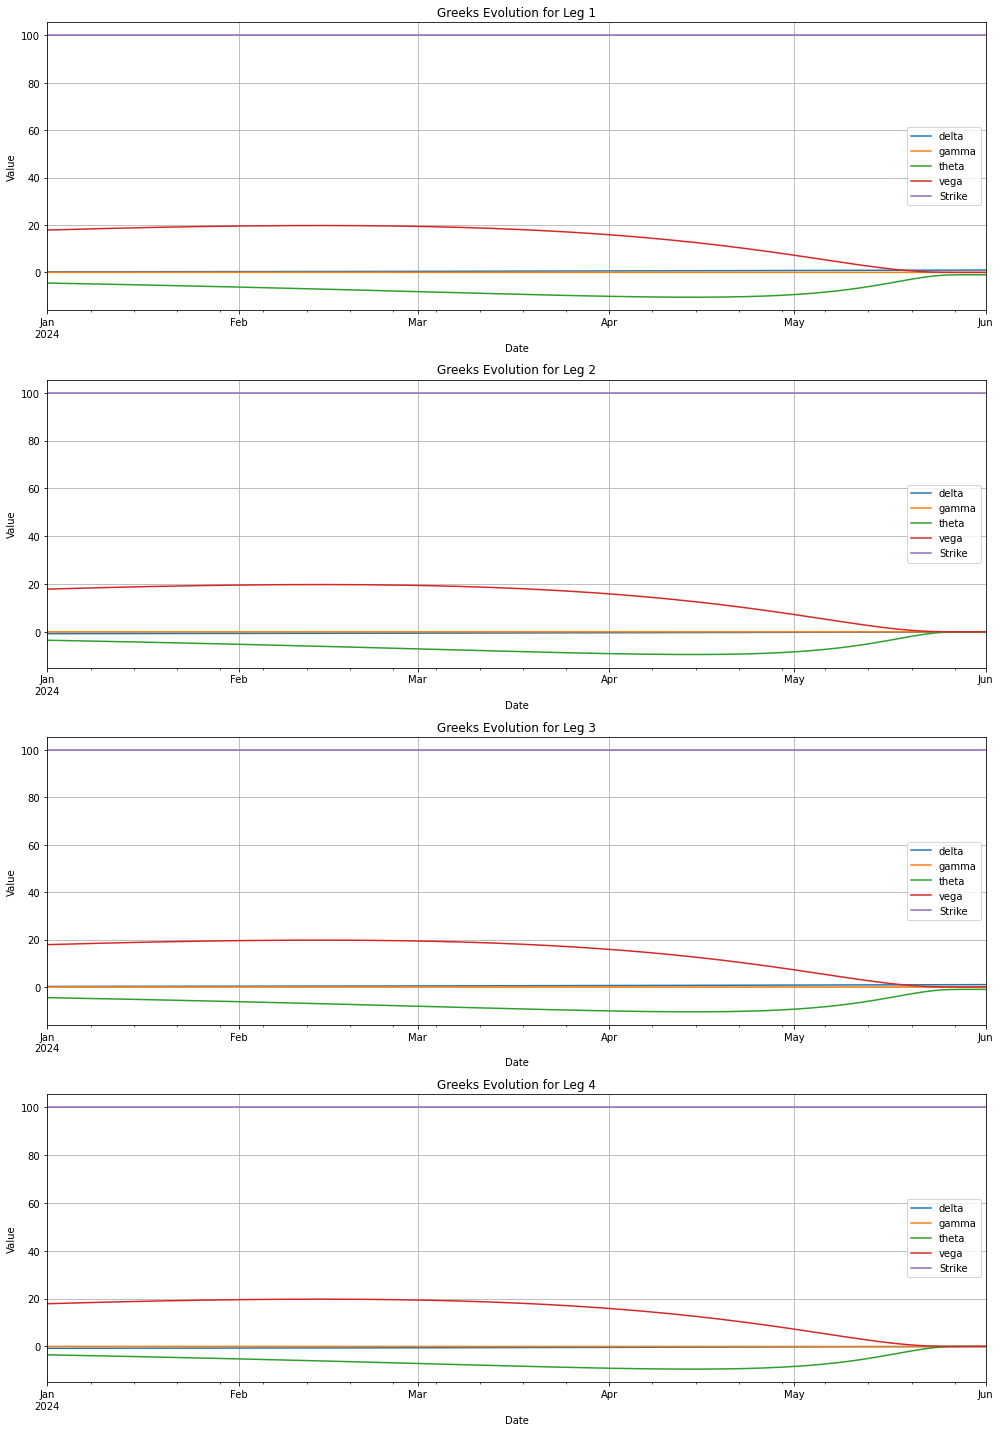

In [191]:
import matplotlib.pyplot as plt

def plot_greeks_evolution(greeks_df):
    # Unique leg numbers and 'Total' for plotting
    leg_numbers = greeks_df.index.get_level_values('Leg Number').unique()
    
    # Plot settings
    fig, axes = plt.subplots(nrows=len(leg_numbers), ncols=1, figsize=(14, 5 * len(leg_numbers)))
    if len(leg_numbers) == 1:
        axes = [axes]  # Ensure axes is a list even with a single plot

    # Plot each leg's Greeks evolution
    for ax, leg_number in zip(axes, leg_numbers):
        leg_data = greeks_df.xs(leg_number, level='Leg Number')
        leg_data.plot(ax=ax, title=f"Greeks Evolution for Leg {leg_number}")
        ax.grid(True)
        ax.set_xlabel("Date")
        ax.set_ylabel("Value")
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_greeks_evolution(greeks_evolution_df)  # Assuming greeks_df is your DataFrame with Greeks evolution data

# Note: Call this function with your actual greeks_df DataFrame to plot the Greeks evolution.
# This example won't run as is because greeks_df is not defined in this context.

In [192]:
# Example usage
basic_pnl_df = calculate_pnl_basic(greeks_evolution_df, market_data_df, trade_structure)
basic_pnl_df.head()

,Leg 1 call 100 PnL,Leg 2 put 100 PnL,Leg 3 call 100 PnL,Leg 4 put 100 PnL,Total PnL
2024-01-01,0.000000,-0.000000,-0.000000,0.000000,0.0
2024-01-02,0.031366,-0.100213,-0.031366,0.100213,0.0
2024-01-03,0.063417,-0.199741,-0.063417,0.199741,0.0
2024-01-04,0.096162,-0.298575,-0.096162,0.298575,0.0
2024-01-05,0.129612,-0.396704,-0.129612,0.396704,0.0


In [193]:
advanced_pnl_df = calculate_pnl_advanced(greeks_evolution_df, market_data_df, trade_structure)
advanced_pnl_df.head()

,Leg call 100 PnL,Leg put 100 PnL,Total PnL
2024-01-01,0.012308,0.009580,0.000000e+00
2024-01-02,-0.019155,0.109695,-1.387779e-17
2024-01-03,-0.051773,0.208657,2.775558e-17
2024-01-04,-0.085564,0.306445,0.000000e+00
2024-01-05,-0.120550,0.403037,-5.551115e-17


### Incorporating Greeks into  PnL  

Provide a more nuanced understanding of the options positions' sensitivities to various market factors. Here's a guide on which Greeks to incorporate and how to do so:

1. Delta (Δ)
Delta represents the sensitivity of an option's price to changes in the price of the underlying asset.

How to Incorporate: Calculate PnL due to price movements in the underlying asset. For each leg, multiply the delta by the change in the spot price, and then by the position size.

2. Gamma (Γ)
Gamma measures the rate of change in delta with respect to changes in the underlying price. It's important for assessing the risk of options positions, especially for strategies involving multiple options.

How to Incorporate: Gamma contributes to PnL when there is a large move in the underlying asset's price. Calculate the gamma PnL by using 0.5 * gamma * (change in spot price)^2.

3. Theta (Θ)
Theta represents the time decay of the option's value.

How to Incorporate: Theta typically reduces the option's value as expiration approaches. Calculate the daily time decay (Theta PnL) and subtract it from the total PnL. Note that theta is generally a negative number for long positions.

4. Vega (ν)
Vega measures sensitivity to changes in the implied volatility of the underlying asset.

How to Incorporate: Vega affects PnL based on changes in implied volatility. Multiply vega by the change in implied volatility (ensure the volatility change is in the same unit of measurement as Vega, typically a percentage).

5. Rho (ρ)
Rho measures sensitivity to changes in the risk-free interest rate.

How to Incorporate: Rho is more important for longer-term options. Multiply rho by the change in interest rates to estimate its impact on PnL.

In [195]:
greeks_df = greeks_evolution_df
greeks_df

,,delta,gamma,theta,vega,Type,Position,Strike
Date,Leg Number,,,,,,,
2024-01-01,1,2.358064e-01,2.651468e-02,-4.492530e+00,1.787536e+01,call,long,100
2024-01-02,1,2.383825e-01,2.672256e-02,-4.541319e+00,1.794935e+01,call,long,100
2024-01-03,1,2.409837e-01,2.693144e-02,-4.590512e+00,1.802236e+01,call,long,100
2024-01-04,1,2.436100e-01,2.714130e-02,-4.640111e+00,1.809435e+01,call,long,100
2024-01-05,1,2.462619e-01,2.735214e-02,-4.690117e+00,1.816530e+01,call,long,100
...,...,...,...,...,...,...,...,...
2024-05-28,4,-7.112900e-06,1.412808e-05,-3.378534e-03,3.708535e-04,put,short,100
2024-05-29,4,-1.952413e-07,5.166993e-07,-1.239307e-04,1.019675e-05,put,short,100
2024-05-30,4,-1.594409e-10,6.323528e-10,-1.521227e-07,8.339388e-09,put,short,100


In [196]:
def calculate_advanced_pnl(greeks_df, market_data_df, trade_structure):
    pnl_df = pd.DataFrame(index=market_data_df.index)
    
    for index, row in market_data_df.iterrows():
        total_pnl = 0
        for leg in trade_structure:
            leg_greeks = greeks_df.loc[(index, leg['Leg Number'])]

            delta_pnl = leg_greeks['delta'] * (row['Spot'] - row['Previous Spot'])
            gamma_pnl = 0.5 * leg_greeks['gamma'] * ((row['Spot'] - row['Previous Spot']) ** 2)
            theta_pnl = leg_greeks['theta'] / 365  # Assuming daily theta
            vega_pnl = leg_greeks['vega'] * (row['Implied Volatility'] - row['Previous Implied Volatility'])
            rho_pnl = leg_greeks.get('rho', 0) * (row['Interest Rate'] - row['Previous Interest Rate'])

            position_multiplier = 1 if leg['Position'] == 'long' else -1
            leg_pnl = position_multiplier * (delta_pnl + gamma_pnl + theta_pnl + vega_pnl + rho_pnl)

            # Update the PnL for the individual leg
            pnl_label = f"Leg {leg['Leg Number']} PnL"
            pnl_df.loc[index, pnl_label] = leg_pnl

            total_pnl += leg_pnl

        # Update the total PnL for the trade
        pnl_df.loc[index, 'Total PnL'] = total_pnl

    return pnl_df


In [197]:
# Fake market data

# Sample dates
dates = pd.date_range(start="2024-01-01", end="2024-06-01", freq='B')  # Business days from Jan to Jun 2024

# Generate synthetic Spot Prices and Implied Volatility
np.random.seed(0)
spot_prices = np.random.uniform(low=100, high=200, size=len(dates))
implied_volatility = np.random.uniform(low=0.15, high=0.35, size=len(dates))  # Implied volatility between 15% and 35%

# Generate synthetic Interest Rates (if required)
interest_rates = np.random.uniform(low=0.01, high=0.05, size=len(dates))  # Interest rates between 1% and 5%

# Create market_data_df DataFrame
market_data_df = pd.DataFrame({
    'Spot': spot_prices,
    'Implied Volatility': implied_volatility,
    'Interest Rate': interest_rates
}, index=dates)

# Adding previous day's Spot and Implied Volatility for PnL calculations
market_data_df['Previous Spot'] = market_data_df['Spot'].shift(1)
market_data_df['Previous Implied Volatility'] = market_data_df['Implied Volatility'].shift(1)
market_data_df['Previous Interest Rate'] = market_data_df['Interest Rate'].shift(1)

# Fill the NaN values for the first row if needed
market_data_df.fillna(method='bfill', inplace=True)

# Display the first few rows
(market_data_df.head())

,Spot,Implied Volatility,Interest Rate,Previous Spot,Previous Implied Volatility,Previous Interest Rate
2024-01-01,154.881350,0.239425,0.035159,154.881350,0.239425,0.035159
2024-01-02,171.518937,0.319282,0.044906,154.881350,0.239425,0.035159
2024-01-03,160.276338,0.289896,0.020942,171.518937,0.319282,0.044906
2024-01-04,154.488318,0.209487,0.041922,160.276338,0.289896,0.020942
2024-01-05,142.365480,0.312760,0.017425,154.488318,0.209487,0.041922


In [202]:
greeks_df.tail(20)

,,delta,gamma,theta,vega,Type,Position,Strike
Date,Leg Number,,,,,,,
2024-05-13,4,-5.265322e-02,2.191551e-02,-5.007512e+00,2.634886e+00,put,short,100
2024-05-14,4,-4.553900e-02,2.002613e-02,-4.589951e+00,2.286592e+00,put,short,100
2024-05-15,4,-3.877026e-02,1.806808e-02,-4.153939e+00,1.953175e+00,put,short,100
2024-05-16,4,-3.239880e-02,1.605521e-02,-3.702525e+00,1.637481e+00,put,short,100
2024-05-17,4,-2.647933e-02,1.400668e-02,-3.240018e+00,1.342534e+00,put,short,100
2024-05-18,4,-2.106809e-02,1.194798e-02,-2.772259e+00,1.071467e+00,put,short,100
2024-05-19,4,-1.622064e-02,9.912044e-03,-2.306888e+00,8.274063e-01,put,short,100
2024-05-20,4,-1.198838e-02,7.940004e-03,-1.853552e+00,6.132944e-01,put,short,100
2024-05-21,4,-8.413611e-03,6.081250e-03,-1.423950e+00,4.316244e-01,put,short,100


In [201]:
def calculate_advanced_pnl(greeks_df, market_data_df, trade_structure):
    # Creating a MultiIndex for columns: first level - leg number, second level - PnL type
    pnl_columns = pd.MultiIndex.from_product(
        [range(1, len(trade_structure) + 1), 
         ['Delta PnL', 'Gamma PnL', 'Theta PnL', 'Vega PnL', 'Rho PnL', 'Total PnL']],
        names=['Leg', 'PnL Type']
    )
    pnl_df = pd.DataFrame(index=market_data_df.index, columns=pnl_columns)
    
    for index, row in market_data_df.iterrows():
        total_trade_pnl = 0
        for leg in trade_structure:
            leg_number = leg['Leg Number']
            leg_greeks = greeks_df.loc[(index, leg_number)]

            # Calculating individual Greeks' PnL
            delta_pnl = leg_greeks['delta'] * (row['Spot'] - row['Previous Spot'])
            gamma_pnl = 0.5 * leg_greeks['gamma'] * ((row['Spot'] - row['Previous Spot']) ** 2)
            theta_pnl = leg_greeks['theta'] / 365  # Assuming daily theta
            vega_pnl = leg_greeks['vega'] * (row['Implied Volatility'] - row['Previous Implied Volatility'])
            rho_pnl = leg_greeks.get('rho', 0) * (row['Interest Rate'] - row['Previous Interest Rate'])

            position_multiplier = 1 if leg['Position'] == 'long' else -1

            # Total PnL for the leg
            leg_total_pnl = position_multiplier * (delta_pnl + gamma_pnl + theta_pnl + vega_pnl + rho_pnl)
            total_trade_pnl += leg_total_pnl

            # Update PnL DataFrame for each leg
            pnl_df.loc[index, (leg_number, 'Delta PnL')] = delta_pnl * position_multiplier
            pnl_df.loc[index, (leg_number, 'Gamma PnL')] = gamma_pnl * position_multiplier
            pnl_df.loc[index, (leg_number, 'Theta PnL')] = theta_pnl * position_multiplier
            pnl_df.loc[index, (leg_number, 'Vega PnL')] = vega_pnl * position_multiplier
            pnl_df.loc[index, (leg_number, 'Rho PnL')] = rho_pnl * position_multiplier
            pnl_df.loc[index, (leg_number, 'Total PnL')] = leg_total_pnl

        # Update the total PnL for the trade
        pnl_df.loc[index, ('Total Trade', 'Total PnL')] = total_trade_pnl

    return pnl_df
pnl_df = calculate_advanced_pnl(greeks_df, market_data_df, trade_structure)
pnl_df.tail(20)

Leg                 1                                                     \
PnL Type    Delta PnL  Gamma PnL Theta PnL  Vega PnL Rho PnL   Total PnL   
2024-05-06  -54.44104  61.090959 -0.022801 -0.129916     0.0    6.497203   
2024-05-07  31.389464   19.14943 -0.022075  0.377315    -0.0   50.894135   
2024-05-08 -48.640946  43.176884  -0.02129 -0.287727    -0.0   -5.773079   
2024-05-09  53.562589  48.929834 -0.020446 -0.163581     0.0  102.308397   
2024-05-10 -39.464259  24.689163 -0.019541 -0.116005     0.0  -14.910642   
2024-05-13 -10.062218   1.236207 -0.016458  0.022434    -0.0   -8.820035   
2024-05-14  38.495471  16.288078 -0.015314  0.279944     0.0    55.04818   
2024-05-15  -54.44457  28.982554 -0.014119 -0.088165     0.0  -25.564301   
2024-05-16  78.262728  52.517402 -0.012882  0.027144     0.0  130.794391   
2024-05-17 -80.241911  47.579216 -0.011615  0.096687    -0.0  -32.577623   
2024-05-20  66.505143   17.98776 -0.007817  0.011489    -0.0   84.496575   
2024-05-21 -40.437742   5.056797  -0.00664 -0.066767    -0.0  -35.454352   
2024-05-22  46.261698   4.752192 -0.005565   0.02535    -0.0   51.033675   
2024-05-23  22.624151   0.755332 -0.004631 -0.013678     0.0   23.361174   
2024-05-24  -71.21762   4.466239 -0.003875 -0.004429    -0.0  -66.759685   
2024-05-27  32.738357   0.053663 -0.002805  0.000484     0.0   32.789699   
2024-05-28   1.588448   0.000018 -0.002749 -0.000033     0.0    1.585685   
2024-05-29  -1.979002   0.000001  -0.00274       0.0     0.0   -1.981741   
2024-05-30 -34.917027        0.0  -0.00274       0.0    -0.0  -34.919767   
2024-05-31  72.966738        0.0  -0.00274       0.0     0.0   72.963998   

Leg                2                                 ...         3          \
PnL Type   Delta PnL  Gamma PnL Theta PnL  Vega PnL  ...  Vega PnL Rho PnL   
2024-05-06  6.631685  61.090959 -0.020063 -0.129916  ...  0.129916    -0.0   
2024-05-07 -3.494679   19.14943 -0.019337  0.377315  ... -0.377315     0.0   
2024-05-08  4.920306  43.176884 -0.018552 -0.287727  ...  0.287727     0.0   
2024-05-09 -4.890345  48.929834 -0.017708 -0.163581  ...  0.163581    -0.0   
2024-05-10  3.227852  24.689163 -0.016803 -0.116005  ...  0.116005    -0.0   
2024-05-13  0.559255   1.236207 -0.013719  0.022434  ... -0.022434     0.0   
2024-05-14 -1.836686  16.288078 -0.012575  0.279944  ... -0.279944    -0.0   
2024-05-15  2.195969  28.982554 -0.011381 -0.088165  ...  0.088165    -0.0   
2024-05-16  -2.62052  52.517402 -0.010144  0.027144  ... -0.027144    -0.0   
2024-05-17  2.182544  47.579216 -0.008877  0.096687  ... -0.096687     0.0   
2024-05-20 -0.806963   17.98776 -0.005078  0.011489  ... -0.011489     0.0   
2024-05-21  0.343114   5.056797 -0.003901 -0.066767  ...  0.066767     0.0   
2024-05-22 -0.256907   4.752192 -0.002826   0.02535  ...  -0.02535     0.0   
2024-05-23 -0.075301   0.755332 -0.001892 -0.013678  ...  0.013678    -0.0   
2024-05-24   0.12592   4.466239 -0.001136 -0.004429  ...  0.004429     0.0   
2024-05-27 -0.002062   0.053663 -0.000065  0.000484  ... -0.000484    -0.0   
2024-05-28 -0.000011   0.000018 -0.000009 -0.000033  ...  0.000033    -0.0   
2024-05-29       0.0   0.000001      -0.0       0.0  ...      -0.0    -0.0   
2024-05-30       0.0        0.0      -0.0       0.0  ...      -0.0     0.0   
2024-05-31      -0.0        0.0      -0.0       0.0  ...      -0.0    -0.0   

Leg                            4                                         \
PnL Type     Total PnL Delta PnL  Gamma PnL Theta PnL  Vega PnL Rho PnL   
2024-05-06   -6.497203 -6.631685 -61.090959  0.020063  0.129916    -0.0   
2024-05-07  -50.894135  3.494679  -19.14943  0.019337 -0.377315     0.0   
2024-05-08    5.773079 -4.920306 -43.176884  0.018552  0.287727     0.0   
2024-05-09 -102.308397  4.890345 -48.929834  0.017708  0.163581    -0.0   
2024-05-10   14.910642 -3.227852 -24.689163  0.016803  0.116005    -0.0   
2024-05-13    8.820035 -0.559255  -1.236207  0.013719 -0.022434     0.0   
2024-05-14

In [199]:
# Let's create a function to reindex the DataFrame as requested.
# This assumes you have a DataFrame `pnl_df` as shown in the image.

import pandas as pd
import numpy as np

# Dummy data to simulate the DataFrame structure from the image.
# This will be replaced by the actual pnl_df when running the code.
data = {
    ('1', 'Delta PnL'): [0.0, 3.96611, -2.709283, -1.141002, -2.985393],
    ('1', 'Gamma PnL'): [0.0, 3.698527, 1.702014, 0.454633, 2.009879],
    ('1', 'Theta PnL'): [-0.012308, -0.012442, -0.012577, -0.012713, -0.01285],
    ('1', 'Vega PnL'): [0.0, 1.433375, -0.529603, -1.454939, 1.87597],
    ('1', 'Rho PnL'): [0.0, 0.0, -0.0, 0.0, -0.0],
    ('1', 'Total PnL'): [-0.012308, 9.08557, -1.549449, -2.423038, 0.887607],
    ('2', 'Delta PnL'): [-0.0, -12.671476, 8.533316, 4.378, 9.137445],
    ('2', 'Gamma PnL'): [0.0, 3.698527, 1.702014, 0.454633, 2.009879],
    ('2', 'Theta PnL'): [-0.009, -0.0097, -0.0098, -0.0099, -0.0101],
    # ... more data ...
}
index = pd.date_range('2024-01-01', periods=5, freq='D')
pnl_df = pd.DataFrame(data, index=index)

# Function to reindex the DataFrame with a dual index of Time and Leg
def reindex_pnl_dataframe(pnl_df):
    # First, let's unstack the leg level from the column MultiIndex, which will create a new level in the index.
    pnl_df = pnl_df.unstack(level='Leg')
    
    # Now, convert the columns to a normal index and reset index to make 'Leg' and 'Time' as columns
    pnl_df = pnl_df.reset_index().rename(columns={'level_0': 'PnL Type', 'level_1': 'Leg'})
    
    # Then, we set Time and Leg as a MultiIndex for the rows
    pnl_df.set_index(['Date', 'Leg'], inplace=True)
    
    # Sort the index to ensure it's ordered first by Time and then by Leg
    pnl_df.sort_index(inplace=True)
    
    return pnl_df

# Apply the function to the pnl_df DataFrame
reindexed_pnl_df = reindex_pnl_dataframe(pnl_df)
reindexed_pnl_df.head(10)  # Display the first few rows to verify


KeyError: 'Requested level (Leg) does not match index name (None)'

In [ ]:
pnl = pnl_df.unstack().to_frame().sort_index(level='Leg')
pnl

In [ ]:
# Let's create a function to reindex the DataFrame as requested.
# This assumes you have a DataFrame `pnl_df` as shown in the image.

import pandas as pd


def reindex_pnl_dataframe(pnl_df):
    # Unstack the current DataFrame to work with multi-level columns
    pnl_df = pnl_df.unstack().to_frame().sort_index(level=1)
    
    # The `to_frame` call converts the Series to DataFrame and names the column '0'
    # We rename it to 'PnL' for clarity
    pnl_df.rename(columns={0: 'PnL'}, inplace=True)
    
    # Now, reset index to turn the MultiIndex into columns
    pnl_df.reset_index(inplace=True)
    
    # Rename columns to match the desired output
    pnl_df.rename(columns={'level_0': 'Leg', 'level_1': 'PnL Type', 'Date': 'Time'}, inplace=True)
    
    # Set the new MultiIndex for rows
    pnl_df.set_index(['Time', 'Leg'], inplace=True)
    
    # Optionally, sort by 'Time' and then 'Leg' if needed
    pnl_df.sort_index(inplace=True)
    
    return pnl_df

# Use the function to reindex the DataFrame
reindexed_pnl_df = reindex_pnl_dataframe(pnl_df)
reindexed_pnl_df.head(10)  # Display the first few rows to verify


In [200]:
# I will generate the code that could reindex the DataFrame as per the user's description. 
# However, since I cannot directly see or interact with the user's local environment or the original DataFrame,
# I'll provide a mock-up DataFrame and demonstrate the reindexing process on it.

import pandas as pd

# Let's assume this is the pnl_df provided by the user
# Creating a mock-up DataFrame similar to the one in the user's description
data = {
    ('1', 'Delta PnL'): [0.0, 3.96611, -2.709283, -1.141002, -2.985393],
    ('1', 'Gamma PnL'): [0.0, 3.698527, 1.702014, 0.454633, 2.009879],
    ('1', 'Theta PnL'): [-0.012308, -0.012442, -0.012577, -0.012713, -0.01285],
    ('1', 'Vega PnL'): [0.0, 1.433375, -0.529603, -1.454939, 1.87597],
    ('1', 'Rho PnL'): [0.0, 0.0, -0.0, 0.0, -0.0],
    ('1', 'Total PnL'): [-0.012308, 9.08557, -1.549449, -2.423038, 0.887607],
    ('2', 'Delta PnL'): [-0.0, -12.671476, 8.533316, 4.378, 9.137445],
    ('2', 'Gamma PnL'): [0.0, 3.698527, 1.702014, 0.454633, 2.009879],
    ('2', 'Theta PnL'): [-0.009, -0.0097, -0.0098, -0.0099, -0.0101],
    # ... continuing the mock data
}

# Index simulating the dates
dates = pd.date_range(start='2024-01-01', periods=5, freq='D')

# Creating the mock-up DataFrame
mock_df = pd.DataFrame(data, index=dates)

# Now we want to change the indexing to include 'Leg' as a level in the index
# First, we'll melt the DataFrame to long format
long_df = mock_df.reset_index().melt(id_vars=['index'], var_name=['Leg', 'PnL Type'], value_name='Value')

# Now we create the multi-level index from the 'index' and 'Leg' columns
long_df = long_df.set_index(['index', 'Leg']).sort_index()

# Pivoting to get the desired shape
reindexed_df = long_df.pivot_table(values='Value', index=['index', 'Leg'], columns='PnL Type')

# Show the reindexed dataframe
reindexed_df.head()  # Displaying just the head for brevity



PnL Type        Delta PnL  Gamma PnL  Rho PnL  Theta PnL  Total PnL  Vega PnL
index      Leg                                                               
2024-01-01 1     0.000000   0.000000      0.0  -0.012308  -0.012308  0.000000
           2     0.000000   0.000000      NaN  -0.009000        NaN       NaN
2024-01-02 1     3.966110   3.698527      0.0  -0.012442   9.085570  1.433375
           2   -12.671476   3.698527      NaN  -0.009700        NaN       NaN
2024-01-03 1    -2.709283   1.702014      0.0  -0.012577  -1.549449 -0.529603

In [ ]:
pnl_df.info()

In [203]:
import pandas as pd

def calculate_advanced_pnl(greeks_df, market_data_df, trade_structure):
    # Define PnL types for each Greek and total leg PnL
    pnl_types = ['Delta PnL', 'Gamma PnL', 'Theta PnL', 'Vega PnL', 'Rho PnL', 'Total Leg PnL']
    
    # Create an empty DataFrame to hold the PnL data
    leg_numbers = [leg['Leg Number'] for leg in trade_structure] + ['Total']
    dates = market_data_df.index
    index = pd.MultiIndex.from_product([dates, leg_numbers], names=['Date', 'Leg Number'])
    pnl_df = pd.DataFrame(index=index, columns=pnl_types).sort_index()
    
    for date in dates:
        daily_total_pnl = 0  # Reset daily total PnL for each date
        
        for leg in trade_structure:
            leg_number = leg['Leg Number']
            leg_greeks = greeks_df.loc[(date, leg_number)]
            market_row = market_data_df.loc[date]

            # Calculate PnL for each Greek
            delta_pnl = leg_greeks['delta'] * (market_row['Spot'] - market_row.get('Previous Spot', market_row['Spot']))
            gamma_pnl = 0.5 * leg_greeks['gamma'] * ((market_row['Spot'] - market_row.get('Previous Spot', market_row['Spot'])) ** 2)
            theta_pnl = leg_greeks['theta'] / 365  # Assuming daily theta decay
            vega_pnl = leg_greeks['vega'] * (market_row.get('Implied Volatility', 0) - market_row.get('Previous Implied Volatility', 0))
            rho_pnl = leg_greeks.get('rho', 0) * (market_row.get('Interest Rate', 0) - market_row.get('Previous Interest Rate', 0))

            position_multiplier = 1 if leg['Position'] == 'long' else -1

            # Sum the PnLs for the leg and multiply by position
            leg_total_pnl = (delta_pnl + gamma_pnl + theta_pnl + vega_pnl + rho_pnl) * position_multiplier
            daily_total_pnl += leg_total_pnl  # Add to daily total PnL

            # Assign PnL values to the DataFrame
            pnl_df.loc[(date, leg_number), 'Delta PnL'] = delta_pnl * position_multiplier
            pnl_df.loc[(date, leg_number), 'Gamma PnL'] = gamma_pnl * position_multiplier
            pnl_df.loc[(date, leg_number), 'Theta PnL'] = theta_pnl * position_multiplier
            pnl_df.loc[(date, leg_number), 'Vega PnL'] = vega_pnl * position_multiplier
            pnl_df.loc[(date, leg_number), 'Rho PnL'] = rho_pnl * position_multiplier
            pnl_df.loc[(date, leg_number), 'Total Leg PnL'] = leg_total_pnl

        # Assign the daily total PnL to the 'Total' row
        pnl_df.loc[(date, 'Total'), 'Total Leg PnL'] = daily_total_pnl

    return pnl_df
pnl_df = calculate_advanced_pnl(greeks_df, market_data_df, trade_structure)
pnl_df 

Delta PnL Gamma PnL Theta PnL Vega PnL Rho PnL  \
Date       Leg Number                                                   
2024-01-01 1                 0.0       0.0 -0.012308      0.0     0.0   
           2                -0.0       0.0  -0.00958      0.0     0.0   
           3                -0.0      -0.0  0.012308     -0.0    -0.0   
           4                 0.0      -0.0   0.00958     -0.0    -0.0   
           Total             NaN       NaN       NaN      NaN     NaN   
...                          ...       ...       ...      ...     ...   
2024-05-31 1           72.966738       0.0  -0.00274      0.0     0.0   
           2                -0.0       0.0      -0.0      0.0     0.0   
           3          -72.966738      -0.0   0.00274     -0.0    -0.0   
           4                 0.0      -0.0       0.0     -0.0    -0.0   
           Total             NaN       NaN       NaN      NaN     NaN   

                      Total Leg PnL  
Date       Leg Number                
2024-01-01 1              -0.012308  
           2               -0.00958  
           3               0.012308  
           4                0.00958  
           Total                0.0  
...                             ...  
2024-05-31 1              72.963998  
           2                    0.0  
           3             -72.963998  
           4                   -0.0  
           Total               -0.0  

[550 rows x 6 columns]

In [209]:
greeks_evolution_df#.sort_index(inplace=True)

delta         gamma         theta          vega  \
Date       Leg Number                                                           
2024-01-01 1           2.358064e-01  2.651468e-02 -4.492530e+00  1.787536e+01   
           2          -7.641936e-01  2.651468e-02 -3.496683e+00  1.787536e+01   
           3           2.358064e-01  2.651468e-02 -4.492530e+00  1.787536e+01   
           4          -7.641936e-01  2.651468e-02 -3.496683e+00  1.787536e+01   
2024-01-02 1           2.383825e-01  2.672256e-02 -4.541319e+00  1.794935e+01   
...                             ...           ...           ...           ...   
2024-05-31 4          -1.117474e-19  8.853779e-19 -2.136263e-16  5.852134e-18   
2024-06-01 1           1.000000e+00  0.000000e+00 -1.000000e+00  0.000000e+00   
           2          -0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
           3           1.000000e+00  0.000000e+00 -1.000000e+00  0.000000e+00   
           4          -0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

                       Type Position  Strike  
Date       Leg Number                         
2024-01-01 1           call     long     100  
           2            put     long     100  
           3           call    short     100  
           4            put    short     100  
2024-01-02 1           call     long     100  
...                     ...      ...     ...  
2024-05-31 4            put    short     100  
2024-06-01 1           call     long     100  
           2            put     long     100  
           3           call    short     100  
           4            put    short     100  

[612 rows x 7 columns]

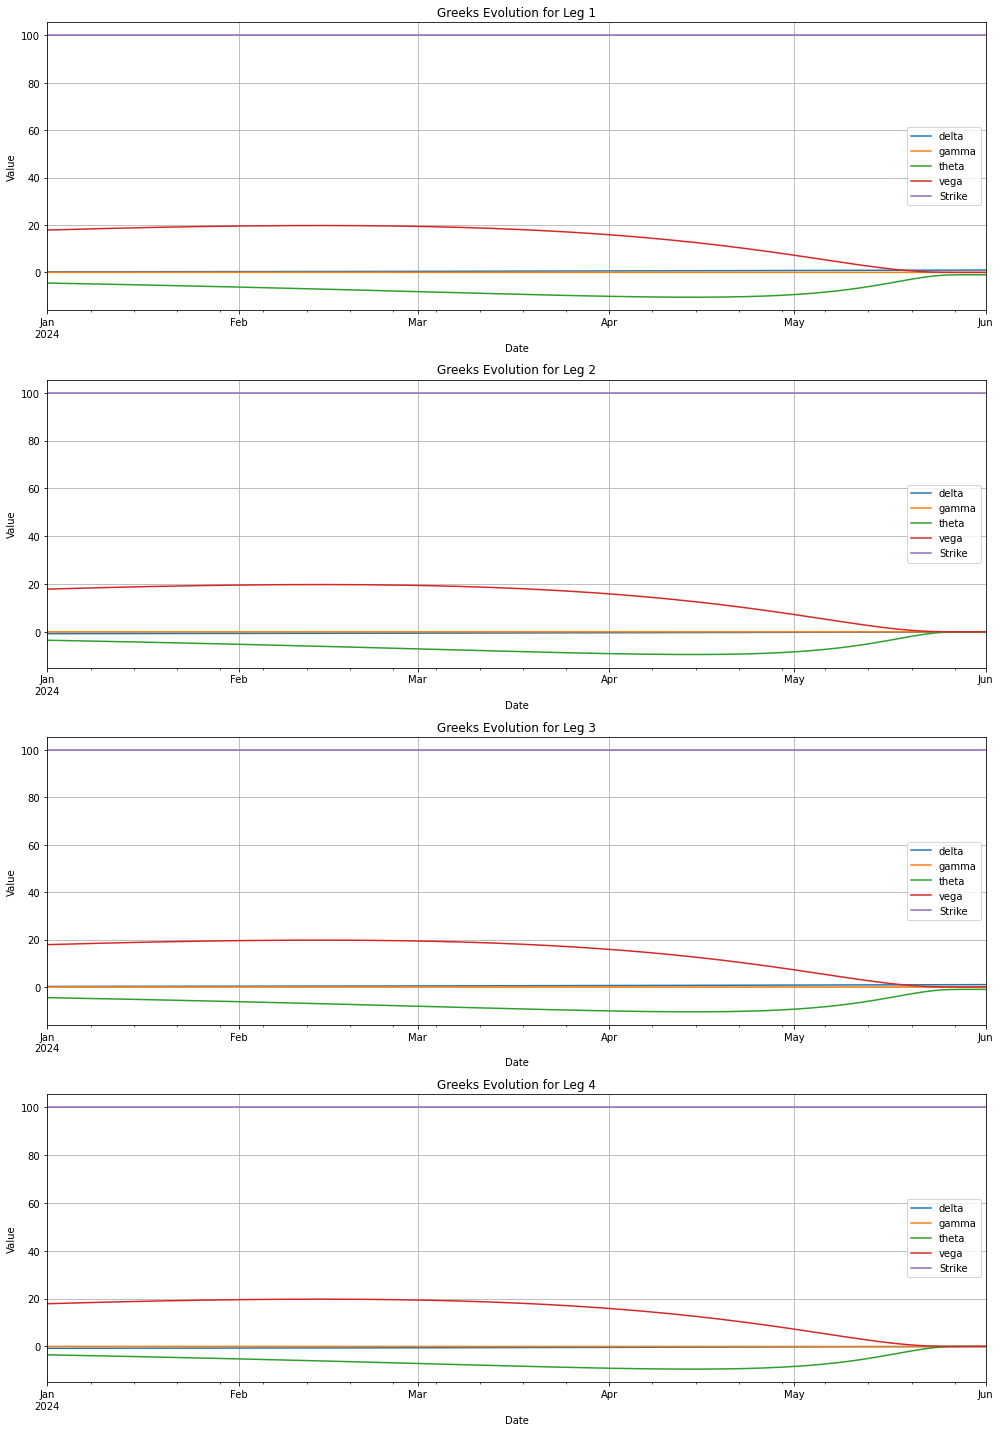

In [204]:
import matplotlib.pyplot as plt

def plot_greeks_evolution(greeks_df):
    # Unique leg numbers and 'Total' for plotting
    leg_numbers = greeks_df.index.get_level_values('Leg Number').unique()
    
    # Plot settings
    fig, axes = plt.subplots(nrows=len(leg_numbers), ncols=1, figsize=(14, 5 * len(leg_numbers)))
    if len(leg_numbers) == 1:
        axes = [axes]  # Ensure axes is a list even with a single plot

    # Plot each leg's Greeks evolution
    for ax, leg_number in zip(axes, leg_numbers):
        leg_data = greeks_df.xs(leg_number, level='Leg Number')
        leg_data.plot(ax=ax, title=f"Greeks Evolution for Leg {leg_number}")
        ax.grid(True)
        ax.set_xlabel("Date")
        ax.set_ylabel("Value")
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_greeks_evolution(greeks_evolution_df)  # Assuming greeks_df is your DataFrame with Greeks evolution data

# Note: Call this function with your actual greeks_df DataFrame to plot the Greeks evolution.
# This example won't run as is because greeks_df is not defined in this context.

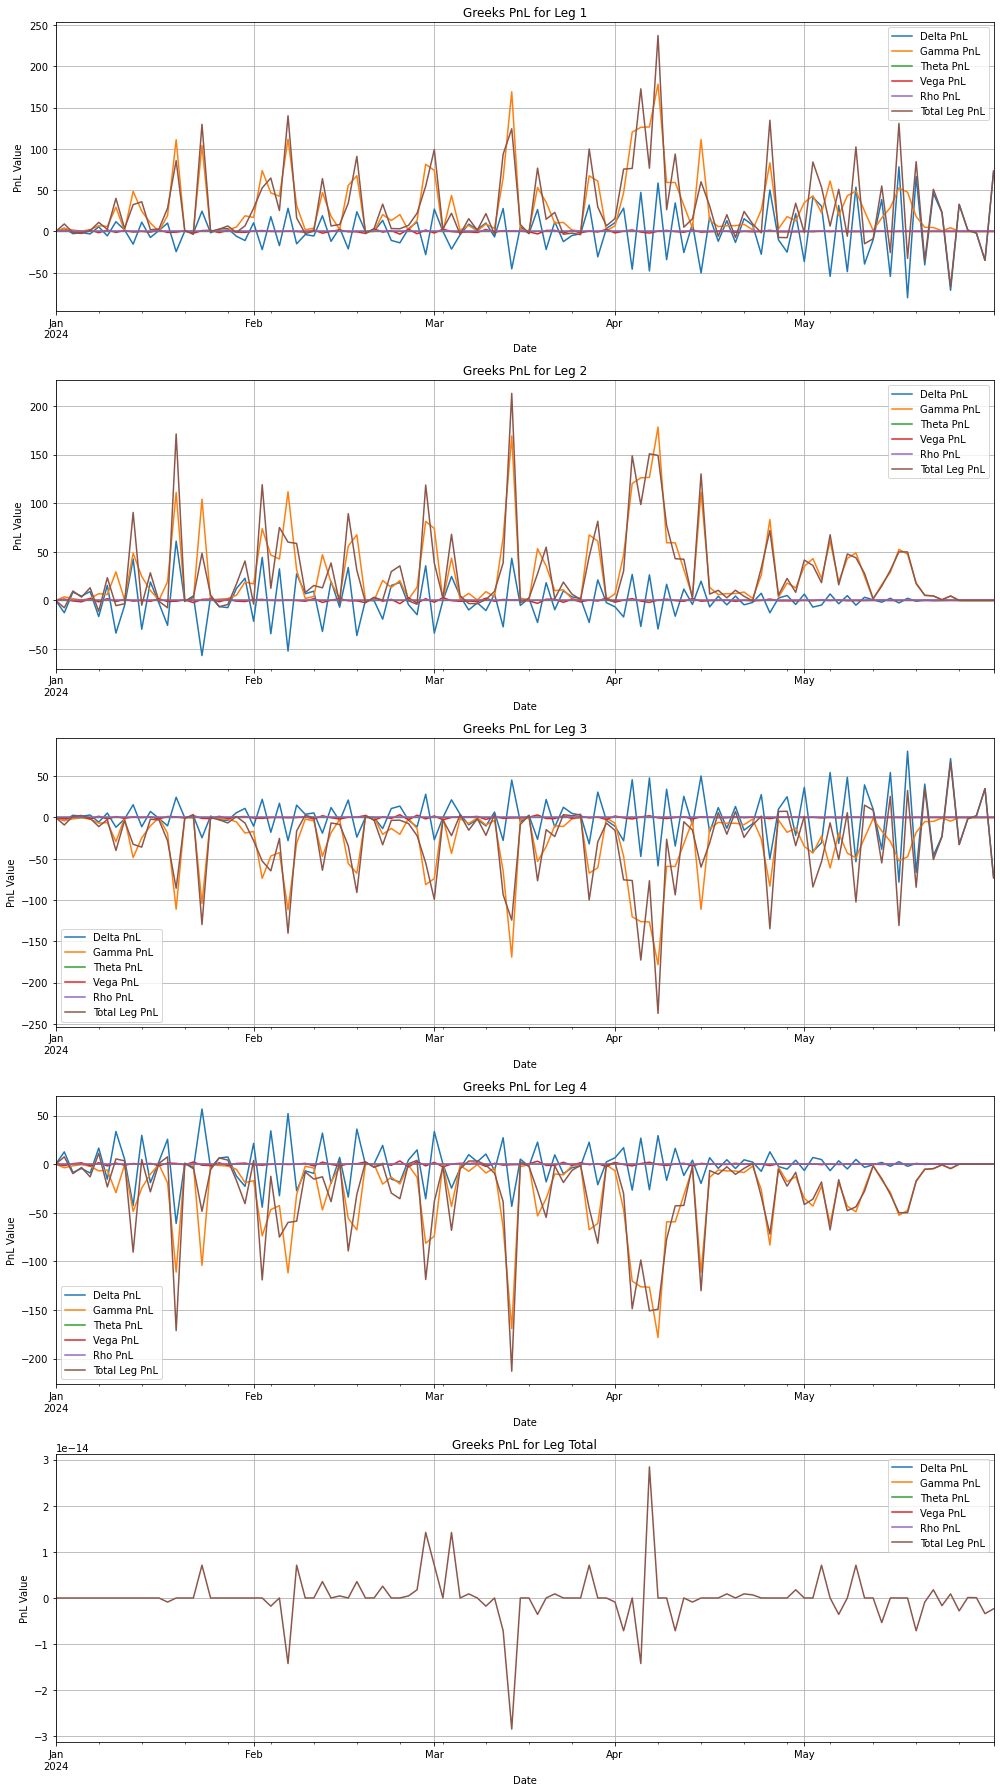

In [205]:
import matplotlib.pyplot as plt

def plot_greeks_pnl(pnl_df):
    # Extract unique leg numbers including 'Total'
    leg_numbers = pnl_df.index.get_level_values('Leg Number').unique()

    # Setting up the plot - one subplot for each leg and total
    fig, axes = plt.subplots(nrows=len(leg_numbers), ncols=1, figsize=(14, 5 * len(leg_numbers)))
    if len(leg_numbers) == 1:
        axes = [axes]  # Ensure axes is a list even with a single plot

    # Plotting the PnL for each leg
    for ax, leg_number in zip(axes, leg_numbers):
        leg_data = pnl_df.xs(leg_number, level='Leg Number')
        leg_data.plot(ax=ax, title=f"Greeks PnL for Leg {leg_number}")
        ax.grid(True)
        ax.set_xlabel("Date")
        ax.set_ylabel("PnL Value")

    plt.tight_layout()
    plt.show()

# Example usage
plot_greeks_pnl(pnl_df)  # Assuming pnl_df is your DataFrame with PnL data

# Note: Call this function with your actual pnl_df DataFrame to plot the PnL for each leg and total.
# This example won't run as is because pnl_df is not defined in this context.


In [206]:
pnl_df

Delta PnL Gamma PnL Theta PnL Vega PnL Rho PnL  \
Date       Leg Number                                                   
2024-01-01 1                 0.0       0.0 -0.012308      0.0     0.0   
           2                -0.0       0.0  -0.00958      0.0     0.0   
           3                -0.0      -0.0  0.012308     -0.0    -0.0   
           4                 0.0      -0.0   0.00958     -0.0    -0.0   
           Total             NaN       NaN       NaN      NaN     NaN   
...                          ...       ...       ...      ...     ...   
2024-05-31 1           72.966738       0.0  -0.00274      0.0     0.0   
           2                -0.0       0.0      -0.0      0.0     0.0   
           3          -72.966738      -0.0   0.00274     -0.0    -0.0   
           4                 0.0      -0.0       0.0     -0.0    -0.0   
           Total             NaN       NaN       NaN      NaN     NaN   

                      Total Leg PnL  
Date       Leg Number                
2024-01-01 1              -0.012308  
           2               -0.00958  
           3               0.012308  
           4                0.00958  
           Total                0.0  
...                             ...  
2024-05-31 1              72.963998  
           2                    0.0  
           3             -72.963998  
           4                   -0.0  
           Total               -0.0  

[550 rows x 6 columns]